In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [13]:
# Load the data
file_path = 'C:/Users/ashut/Downloads/USAIR.csv'  # Update this with your correct file path
data = pd.read_csv(file_path)

# Dropping unnecessary columns
columns_to_drop = ['OriginCityId', 'DestinationCityID', 'OriginCity', 'DestinationCity',
                   'OriginAirportId', 'DestinationAirportID', 'OriginAirportCode', 'DestinationAirportCode']
data_cleaned = data.drop(columns=columns_to_drop)

# Rename columns for easier use
data_cleaned.rename(columns={'dist bw ap in miles': 'distance', 'fare': 'fare_price'}, inplace=True)

# Display the cleaned data
print(data_cleaned.head())


   Year  quarter  distance  passengers  fare_price
0  2021        3       970         180       81.43
1  2021        3       970          19      208.93
2  2021        3       580         204      184.56
3  2021        3       580         264      182.64
4  2021        3       328         398      177.11


In [14]:
# Define the features (X) and target (y)
X = data_cleaned[['Year', 'quarter', 'distance', 'passengers']]  # Input features
y = data_cleaned['fare_price']  # Target variable (fare)


In [15]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting splits
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (800, 4), Testing set: (200, 4)


In [16]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Display the coefficients of the model
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Coefficients: [ 0.00000000e+00  4.85722573e-17  6.56202101e-02 -2.58953296e-02]
Intercept: 147.36002814679927


In [17]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Display the first few predictions
print("Predicted fares:", y_pred[:5])
print("Actual fares:", y_test.values[:5])


Predicted fares: [208.19024353 239.98866695 177.19602033 313.37238521 179.63775579]
Actual fares: [248.91 203.99 167.36 339.53 110.28]


In [18]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")


Mean Squared Error: 2785.6667596620605
R-squared score: 0.40890854179552205


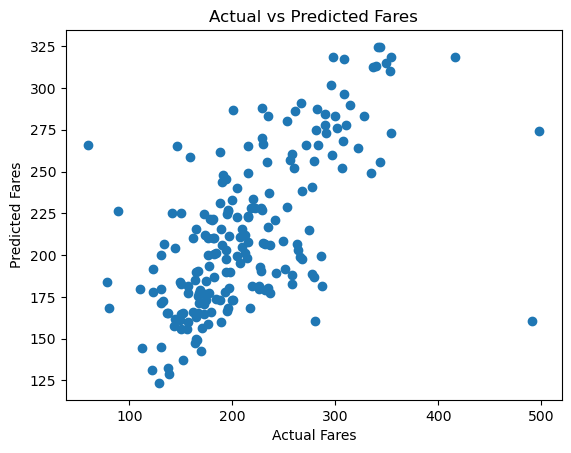

In [19]:
import matplotlib.pyplot as plt

# Plot actual vs predicted fares
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Fares")
plt.ylabel("Predicted Fares")
plt.title("Actual vs Predicted Fares")
plt.show()
